In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
X, y = make_blobs(n_samples=100, centers=2, random_state=20)

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train[:5]

array([[2.20064052, 9.31206357],
       [1.23053677, 9.08003341],
       [0.1331145 , 6.13901875],
       [1.358082  , 9.10319957],
       [8.17910345, 6.7658677 ]])

In [4]:
support_vector_machine = svm.SVC(kernel="linear", C=1000)
support_vector_machine.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

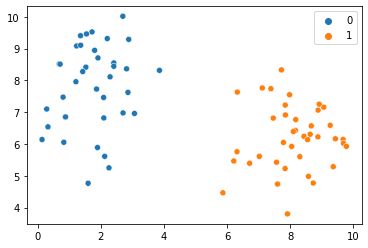

In [5]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.show()

In [6]:
support_vector_machine.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0])

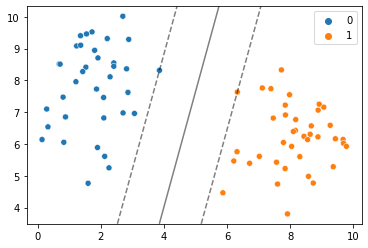

In [7]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = support_vector_machine.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
ax.scatter(support_vector_machine.support_vectors_[:, 0], support_vector_machine.support_vectors_[:, 1], s=100, linewidth=1, facecolors="none")
plt.show()